# Idea: Cleaning Data

#Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

#  Data Integrity
# In this step, we ensure the accuracy, consistency, and reliability of the data.
# We check for any obvious inconsistencies or errors in the data, such as invalid values or data types.

In [ ]:
# Load the dataset

In [2]:
newyork = pd.read_csv('newyork.csv')

# glance the top 5 data

In [3]:
newyork.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


# Check for missing values in each column

In [4]:
missing_values = newyork.isnull().sum()
print("Missing Values:\n", missing_values)
# Decide how to handle missing data: either impute them or make informed decisions based on the context
# For example, impute missing values for numerical columns with the mean or median
# For categorical columns, you might impute with the mode or create a separate category for missing values

Missing Values:
 id                                  0
name                                7
host_id                             0
host_name                           5
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           1
price                               1
minimum_nights                      1
number_of_reviews                   1
last_review                       824
reviews_per_month                 824
calculated_host_listings_count      1
availability_365                    1
dtype: int64


# Check Categorical Columns

In [5]:
newyork.select_dtypes(include='object').head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


# Check Numerical Columns

In [6]:
newyork.select_dtypes(exclude='object').head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0
1,2595,2845,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0
2,3647,4632,40.80902,-73.94190,150.0,3.0,0.0,NaN,1.0,365.0
3,3831,4869,40.68514,-73.95976,89.0,1.0,270.0,4.64,1.0,194.0
4,5022,7192,40.79851,-73.94399,80.0,10.0,9.0,0.10,1.0,0.0


In [7]:
name_modes=newyork['name'].mode()[0]
name_modes

'Loft Suite @ The Box House Hotel'

In [8]:
newyork['name']=newyork['name'].fillna(name_modes)

In [9]:
newyork['name'].isnull().sum()

# name column missing value is fixed

0

# Host name missing value fixed

In [10]:
newyork['host_name'].isnull().sum()

5

In [11]:
mode_host=newyork['host_name'].mode()[0]
mode_host

'Michael'

In [12]:
newyork['host_name']=newyork['host_name'].fillna(mode_host)

In [13]:
newyork['host_name'].isnull().sum()

0

# room_type missing value fixing

In [14]:
mode_room_type=newyork['room_type'].mode()[0]

In [15]:
newyork['room_type']=newyork['room_type'].fillna(mode_room_type)

In [16]:
newyork['room_type'].isnull().sum()

0

# price missing value fixing

In [19]:
median_price=newyork['price'].median()
median_price

120.0

In [20]:
newyork['price']=newyork['price'].fillna(median_price)

In [21]:
newyork['price'].isnull().sum()

0

# minimum_nights column missing value fixing

In [23]:
median_minimum_nights=newyork['minimum_nights'].median()
median_minimum_nights

3.0

In [24]:
newyork['minimum_nights']=newyork['minimum_nights'].fillna(median_minimum_nights)

In [25]:
newyork['minimum_nights'].isnull().sum()

0

# number_of_reviews column missing value fixing

In [26]:
newyork['number_of_reviews']=newyork['number_of_reviews'].fillna(0)

In [27]:
newyork['number_of_reviews'].isnull().sum()

0

# last_review column missing value fixing

In [28]:
mode_last_review=newyork['last_review'].mode()[0]

In [29]:
newyork['last_review']=newyork['last_review'].fillna(mode_last_review)

In [30]:
newyork['last_review'].isnull().sum()

0

# reviews_per_month column missing value fixing

In [31]:
median_reviews_per_month=newyork['reviews_per_month'].median()

In [32]:
newyork['reviews_per_month']=newyork['reviews_per_month'].fillna(median_reviews_per_month)

In [33]:
newyork['reviews_per_month'].isnull().sum()

0

# calculated_host_listings_count,availability_365 columns missing value fixing

In [35]:
median_calculated_host_listings_count=newyork['calculated_host_listings_count'].median()
median_calculated_host_listings_count

1.0

In [36]:
newyork['calculated_host_listings_count']=newyork['calculated_host_listings_count'].fillna(median_calculated_host_listings_count)

In [37]:
newyork['calculated_host_listings_count'].isnull().sum()

0

In [39]:
median_availability_365=newyork['availability_365'].median()
median_availability_365

81.0

In [40]:
newyork['availability_365']=newyork['availability_365'].fillna(median_availability_365)

In [41]:
newyork['availability_365'].isnull().sum ()

0

In [42]:
newyork.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#  Identify duplicate records

In [45]:
duplicate_rows = newyork.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
7386    False
7387    False
7388    False
7389    False
7390    False
Length: 7391, dtype: bool

# Remove duplicate records


In [46]:
newyork_unique = newyork.drop_duplicates()

In [47]:
newyork_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2019-06-23,0.42,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


# Select numerical columns for standardization

In [48]:
numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Initialize the StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns

In [51]:
newyork[numerical_columns] = scaler.fit_transform(newyork[numerical_columns])

# Display the standardized DataFrame

In [52]:
print(newyork.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington -1.579996  -0.028056   
1     Jennifer           Manhattan       Midtown  0.471005  -0.042678   
2    Elisabeth           Manhattan        Harlem  1.541630   0.011026   
3  LisaRoxanne            Brooklyn  Clinton Hill -0.852396  -0.011882   
4        Laura           Manhattan   East Harlem  1.338520   0.008345   

         room_type     price  minimum_nights  number_of_reviews last_review  \
0     Private room -0.065027       -0.253042          -0.5746

# Check the Outliers and capping those all outliers

In [54]:
newyork.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

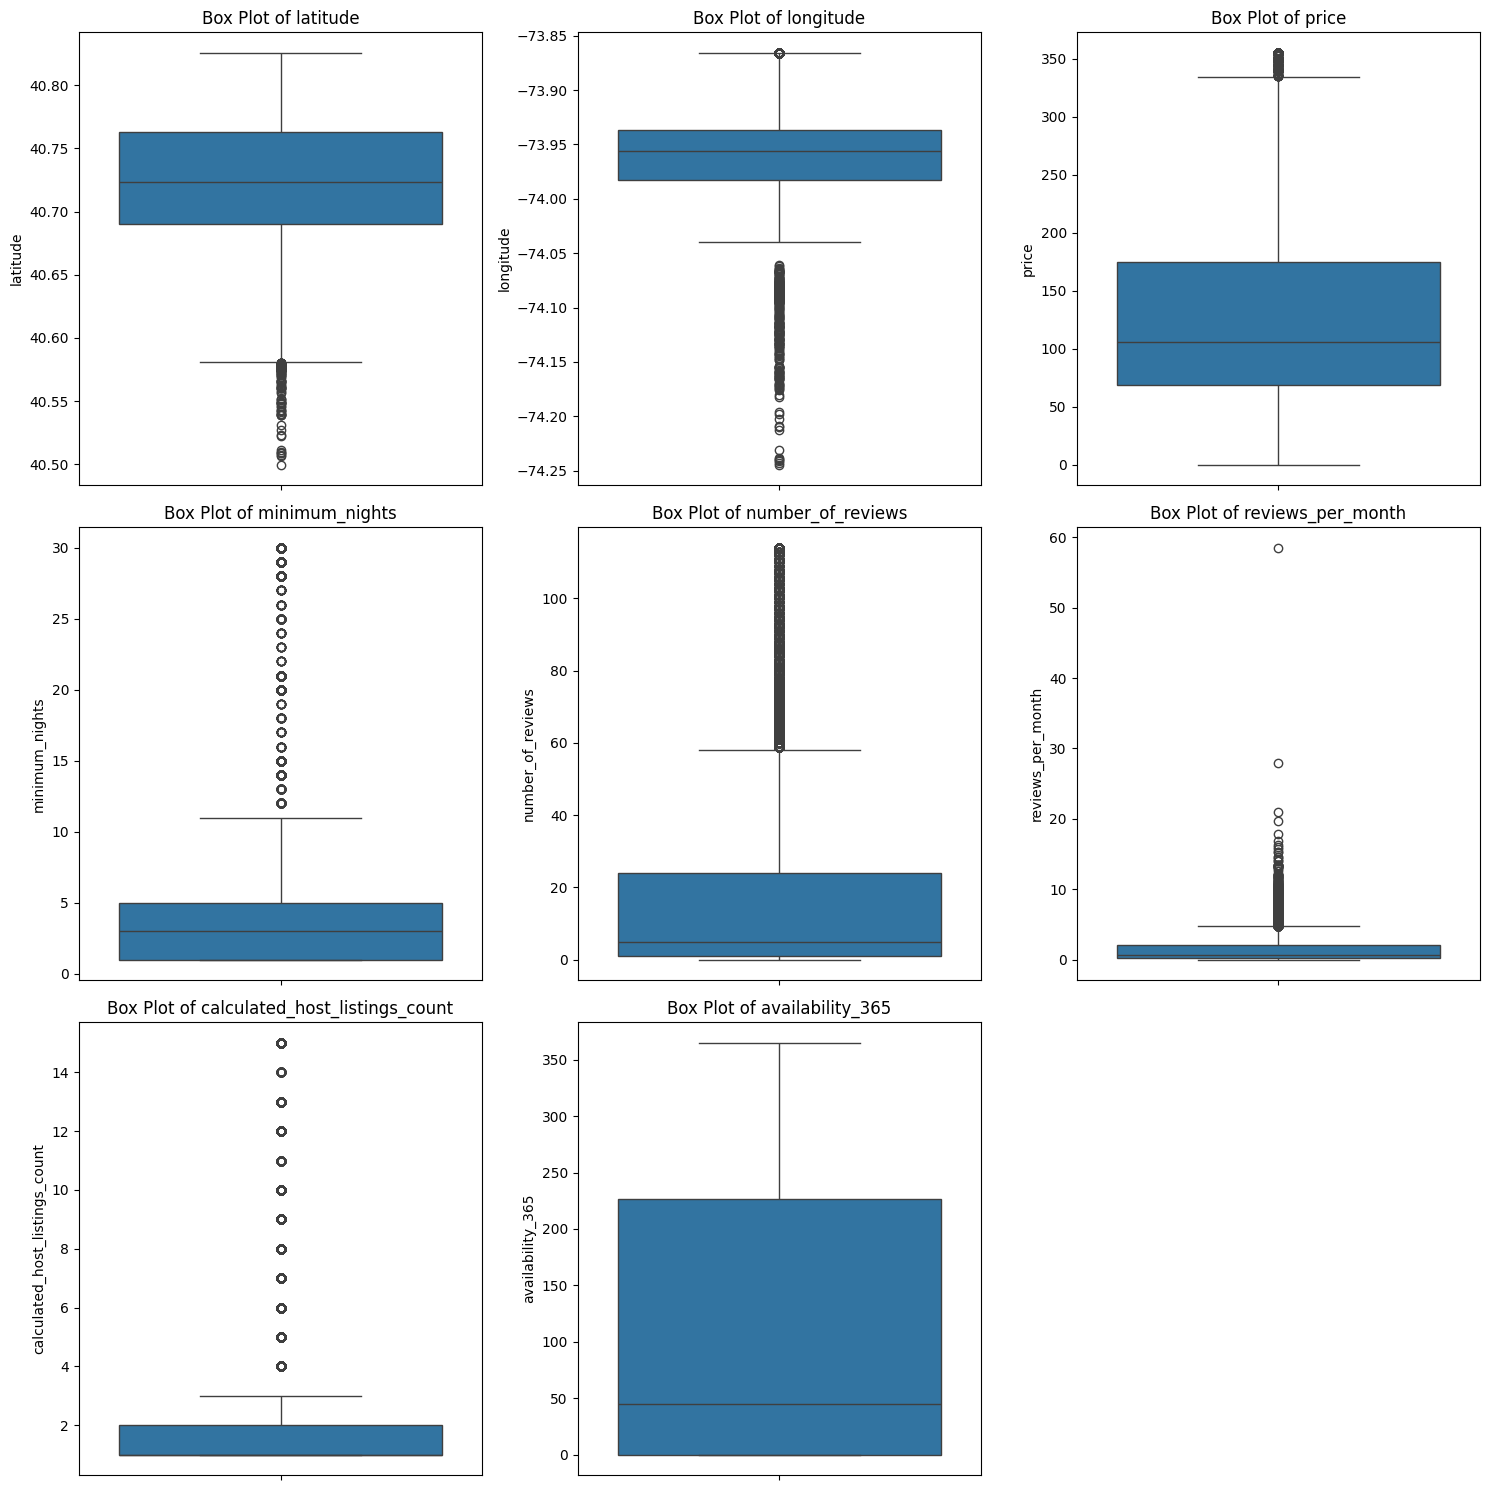

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

l = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Calculate the number of rows and columns for subplots
num_plots = len(l)
num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array if necessary
axes = axes.flatten()

for i, column in enumerate(l):
    sns.boxplot(data=newyork, y=column, orient='v', ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

# Hide unused subplots if any
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [67]:
newyork.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.727797,-73.954807,134.186747,5.952776,20.107618,1.373221,2.476838,112.781327
std,1.098311e+07,7.861097e+07,0.052023,0.038170,86.519544,8.674476,31.359829,1.680442,3.407508,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.825643,-73.865771,355.000000,30.000000,114.000000,58.500000,15.000000,365.000000


# Fix the outliers

In [68]:
# latitude
Q1=newyork['latitude'].describe()['25%']
Q1

40.6901

In [69]:
Q3=newyork['latitude'].describe()['75%']
Q3

40.763115

In [70]:
IQR=Q3-Q1
IQR

0.07301499999999805

In [71]:
L_L=Q1-1.5*IQR
L_L

40.580577500000004

In [72]:
U_L=Q3+1.5*IQR
U_L

40.872637499999996

In [73]:
newyork['latitude']=newyork['latitude'].clip(L_L,U_L)

<Axes: ylabel='latitude'>

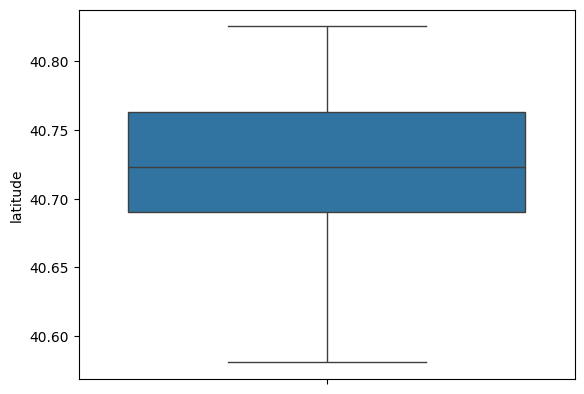

In [74]:
sns.boxplot(newyork['latitude'])

In [75]:
# longitude
Q1=newyork['longitude'].describe()['25%']
Q1
Q3=newyork['longitude'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['longitude']=newyork['longitude'].clip(L_L,U_L)

<Axes: ylabel='longitude'>

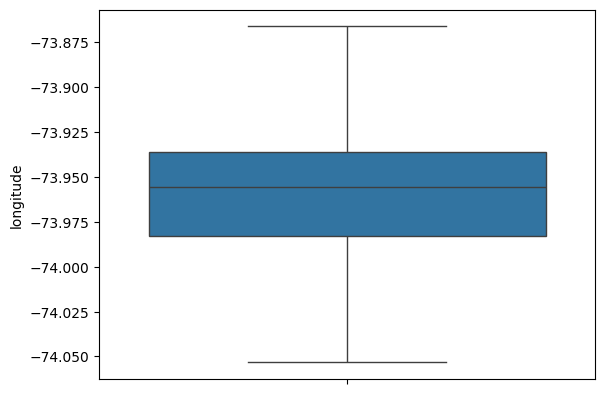

In [76]:
sns.boxplot(newyork['longitude'])

In [77]:
# price
Q1=newyork['price'].describe()['25%']
Q1
Q3=newyork['price'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['price']=newyork['price'].clip(L_L,U_L)

<Axes: ylabel='price'>

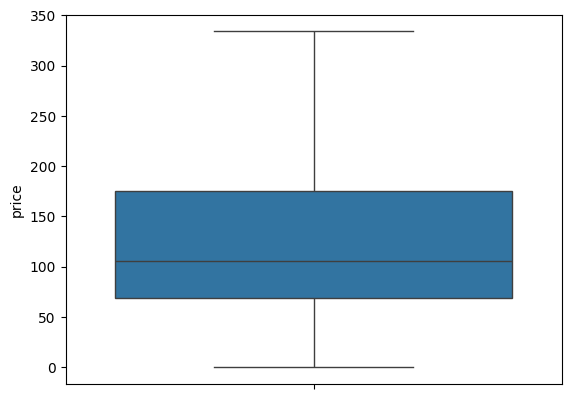

In [78]:
sns.boxplot(newyork['price'])

In [79]:
# minimum_nights
Q1=newyork['minimum_nights'].describe()['25%']
Q1
Q3=newyork['minimum_nights'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['minimum_nights']=newyork['minimum_nights'].clip(L_L,U_L)

<Axes: ylabel='minimum_nights'>

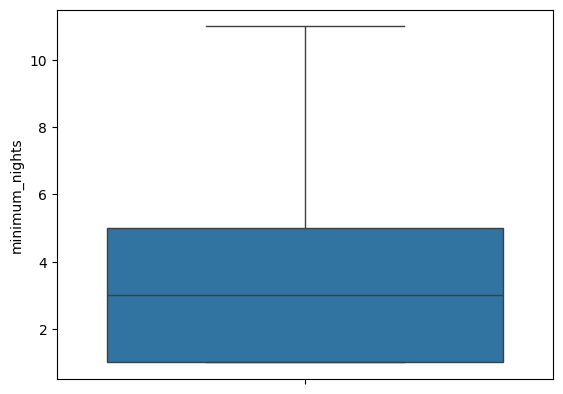

In [80]:
sns.boxplot(newyork['minimum_nights'])

In [81]:
# number_of_reviews
Q1=newyork['number_of_reviews'].describe()['25%']
Q1
Q3=newyork['number_of_reviews'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['number_of_reviews']=newyork['number_of_reviews'].clip(L_L,U_L)

<Axes: ylabel='number_of_reviews'>

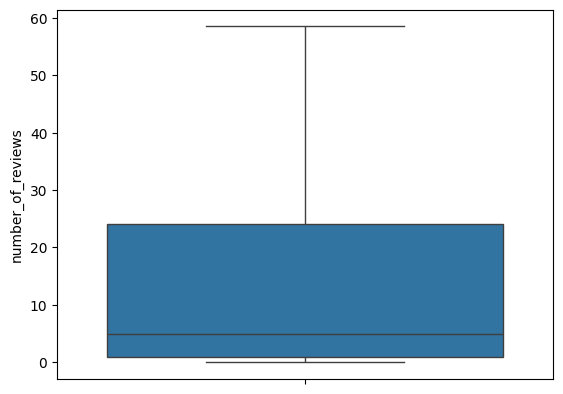

In [82]:
sns.boxplot(newyork['number_of_reviews'])

In [83]:
# reviews_per_month
Q1=newyork['reviews_per_month'].describe()['25%']
Q1
Q3=newyork['reviews_per_month'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['reviews_per_month']=newyork['reviews_per_month'].clip(L_L,U_L)

<Axes: ylabel='reviews_per_month'>

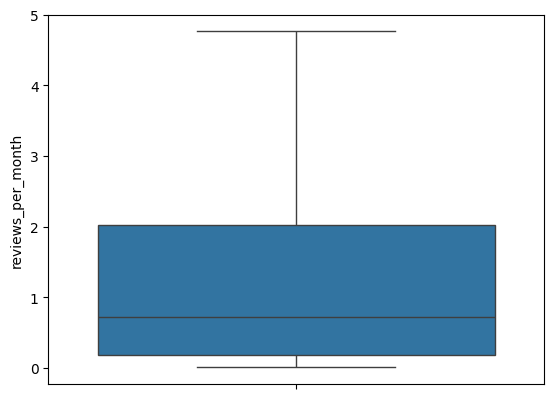

In [84]:
sns.boxplot(newyork['reviews_per_month'])

In [85]:
# calculated_host_listings_count
Q1=newyork['calculated_host_listings_count'].describe()['25%']
Q1
Q3=newyork['calculated_host_listings_count'].describe()['75%']
Q3
IQR=Q3-Q1
IQR
L_L=Q1-1.5*IQR
L_L
U_L=Q3+1.5*IQR
U_L
newyork['calculated_host_listings_count']=newyork['calculated_host_listings_count'].clip(L_L,U_L)

<Axes: ylabel='calculated_host_listings_count'>

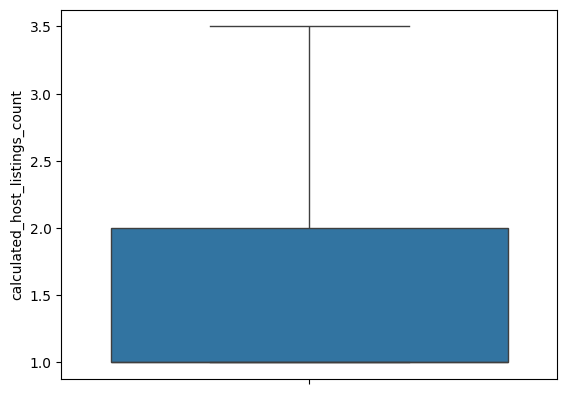

In [86]:
sns.boxplot(newyork['calculated_host_listings_count'])

In [88]:
newyork.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.727842,-73.954422,132.979753,3.82532,15.67419,1.297266,1.614920,112.781327
std,1.098311e+07,7.861097e+07,0.051879,0.036660,83.530504,3.32072,20.34953,1.395207,0.946883,131.622289
min,2.539000e+03,2.438000e+03,40.580578,-74.053263,0.000000,1.00000,0.00000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.825643,-73.866082,334.000000,11.00000,58.50000,4.765000,3.500000,365.000000


<Axes: ylabel='availability_365'>

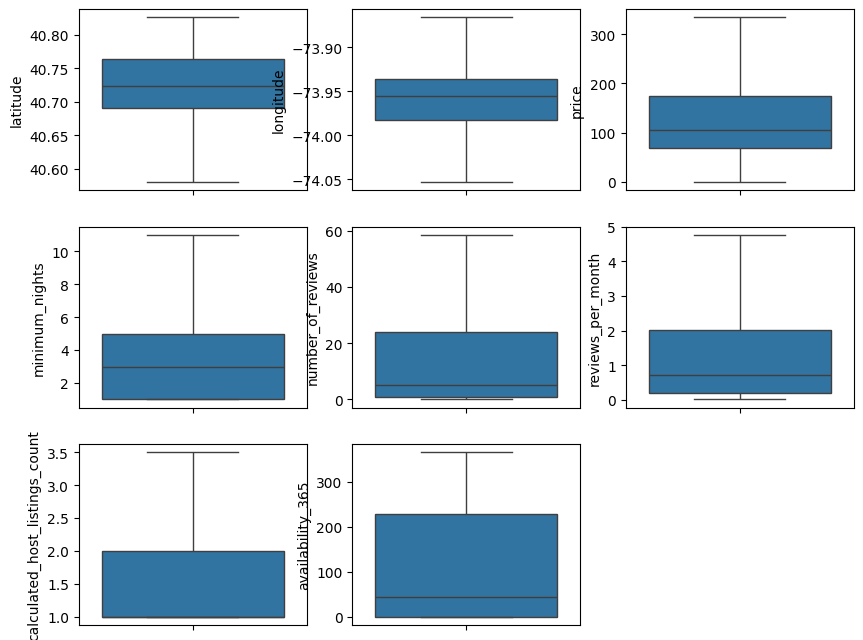

In [93]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.boxplot(newyork['latitude'])
plt.subplot(3,3,2)
sns.boxplot(newyork['longitude'])
plt.subplot(3,3,3)
sns.boxplot(newyork['price'])
plt.subplot(3,3,4)
sns.boxplot(newyork['minimum_nights'])
plt.subplot(3,3,5)
sns.boxplot(newyork['number_of_reviews'])
plt.subplot(3,3,6)
sns.boxplot(newyork['reviews_per_month'])
plt.subplot(3,3,7)
sns.boxplot(newyork['calculated_host_listings_count'])
plt.subplot(3,3,8)
sns.boxplot(newyork['availability_365'])